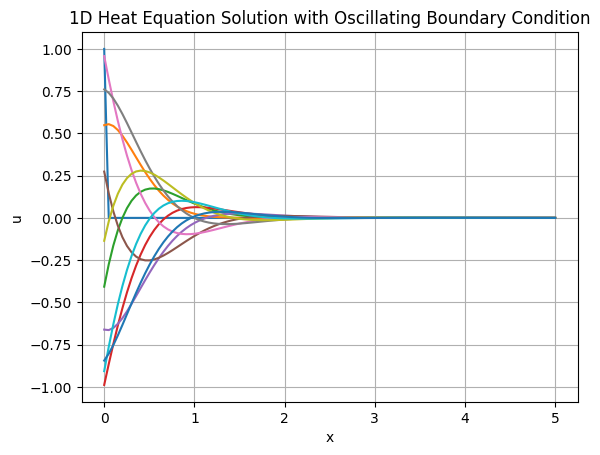

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 5.0  # Length of the domain
nx = 100  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
nt = 1000  # Number of time steps
dt = 0.01  # Time step size
k = 100  # Plotting frequency
D = 0.1  # Diffusion coefficient

# Initialize arrays
x = np.linspace(0, L, nx)
u_initial = np.zeros(nx)
u_solution = np.zeros((nt, nx))

# Function to solve heat equation using finite differences
def solve_heat_equation(u_initial):
    u_new = np.copy(u_initial)
    for i in range(1, nx - 1):
        u_new[i] = u_initial[i] + D * dt * (u_initial[i+1] - 2*u_initial[i] + u_initial[i-1]) / dx**2
    return u_new

# Set initial condition
u_initial[0] = 1.0  # Boundary condition at x=0

# Solve heat equation and plot solution every k timesteps
for t in range(nt):
    if t % k == 0:
        plt.plot(x, u_initial, label=f'Timestep {t}')
    u_initial = solve_heat_equation(u_initial)
    # Update boundary condition at x=0 with cos(t)
    u_initial[0] = np.cos(t * dt)

# Plot final solution
plt.plot(x, u_initial, label=f'Timestep {nt}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Equation Solution with Oscillating Boundary Condition')
plt.grid(True)
plt.show()
